In [3]:
# import all necessary stuff
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import itertools as it

In [4]:
# import and read in CSV
amazon_data_path = "Resources/Amazon_Data.csv"

amazon_data = pd.read_csv(amazon_data_path, delimiter=',', header=0)

In [5]:
# create starter data frame from CSV
amazon_df = pd.DataFrame(amazon_data)

amazon_df.head()

,Index,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,1,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2,2023/06/04 1:28:19 PM GMT+5:31,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,3,2023/06/04 1:28:19 PM GMT+5:32,24,Prefer not to say,Few times a month,"Groceries and Gourmet Food,Clothing and Fashion",No,Few times a month,Keyword,Multiple pages,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,4,2023/06/04 1:28:19 PM GMT+5:33,24,Female,Once a month,"Beauty and Personal Care,Clothing and Fashion,...",Sometimes,Few times a month,Keyword,First page,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,5,2023/06/04 1:28:19 PM GMT+5:34,22,Female,Less than once a month,"Beauty and Personal Care,Clothing and Fashion",Yes,Few times a month,Filter,Multiple pages,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [6]:
# rename columns
amazon_df = amazon_df.rename(columns={"Personalized_Recommendation_Frequency":"Recommendation_Frequency",
                              "Product_Search_Method":"Search_Method",
                              "Search_Result_Exploration":"Exploration",
                              "Saveforlater_Frequency":"Save_for_Later_Frequency",
                              "age":"Age"})
amazon_df.head()

# define variables as dictionaries or lists here
age = amazon_df["Age"]
print(age)

0      23
1      23
2      24
3      24
4      22
       ..
597    23
598    23
599    23
600    23
601    23
Name: Age, Length: 602, dtype: int64


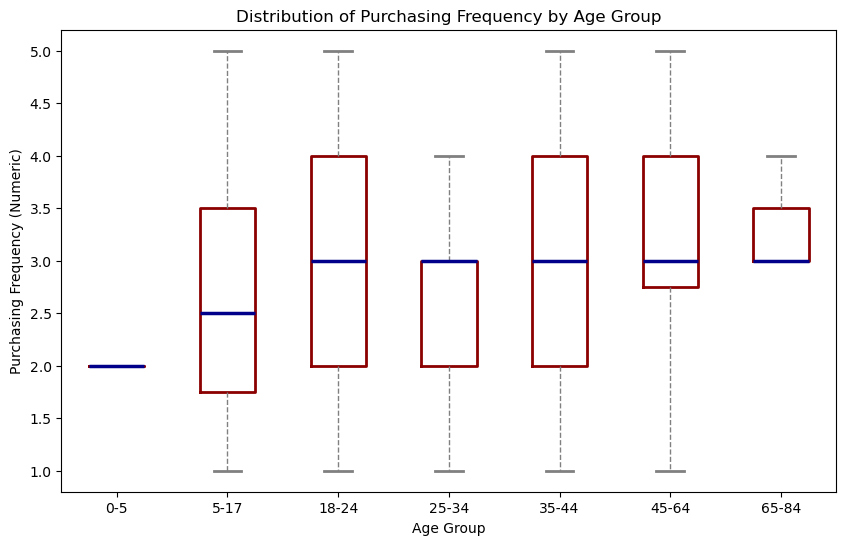

In [7]:
# Question 1: How do different age group's purchasing behaviors compare on Amazon? - Maia

# Creating bins for the age ranges * These ranges are the standard used the in grouping ages by the US Census
age_bins = [0, 5, 17, 24, 34, 44, 64, 84]
age_group_labels = ['0-5', '5-17', '18-24', '25-34', '35-44', '45-64', '65-84']

# Create a new column in the CSV for "Age_Group" 
amazon_df['Age_Group'] = pd.cut(amazon_df['Age'], bins=age_bins, labels=age_group_labels, right=False)

# Mapping the categorical values to numerical values for Purchasing Frequency
purchasing_mapping_dict = {
    "Less than once a month": 1,
    "Once a month": 2,
    "Few times a month": 3,
    "Once a week": 4,
    "Multiple times a week": 5
}

amazon_df['Purchase_Frequency_Numerical'] = amazon_df['Purchase_Frequency'].map(purchasing_mapping_dict)

# Boxplot
plt.figure(figsize=(10, 6))
boxprops = dict(linestyle='-', linewidth=2, color='darkred')
whiskerprops = dict(linestyle='--', linewidth=1, color='gray')
medianprops = dict(linestyle='-', linewidth=2.5, color='darkblue')
capprops = dict(linestyle='-', linewidth=2, color='gray')

# Use 'Age_Group' for the boxplot
plt.boxplot([amazon_df[amazon_df['Age_Group'] == age_group]['Purchase_Frequency_Numerical'] for age_group in age_group_labels],
            labels=age_group_labels, showfliers=False, boxprops=boxprops, whiskerprops=whiskerprops,
            medianprops=medianprops, capprops=capprops)

plt.title('Distribution of Purchasing Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchasing Frequency (Numeric)')
plt.savefig("Output/Age_Purchasing_Boxplot.png")
plt.show()


/var/folders/x5/tfmzh4kj5hl7ht9yk8qtgz7m0000gn/T/ipykernel_839/2343076007.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = amazon_df.groupby('Age_Group')['Purchase_Frequency_Numerical'].value_counts().unstack().fillna(0)


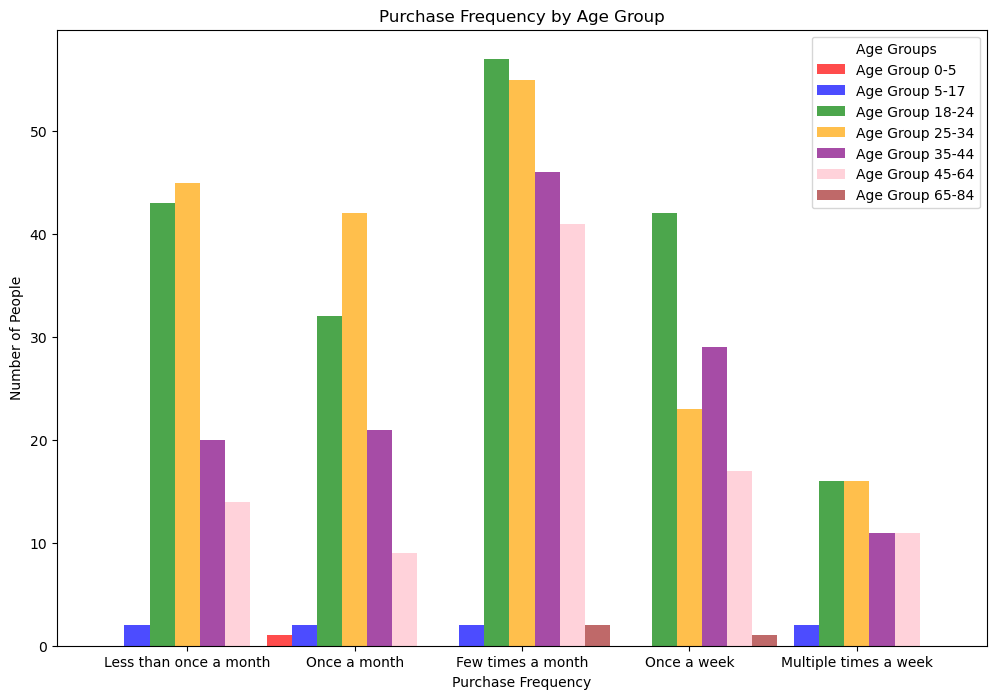

In [8]:
# Define variables:
# Define the different categories of “Purchase Frequency”
x_labels = ['Less than once a month', 'Once a month', 'Few times a month', 'Once a week', 'Multiple times a week']
grouped_data = amazon_df.groupby('Age_Group')['Purchase_Frequency_Numerical'].value_counts().unstack().fillna(0)
# Colors correpsonding with the Age Groups
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown']
# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.15  # Adjust this value to change the width of each bar
for i, (age_group, color) in enumerate(zip(age_group_labels, colors)):
    x_positions = np.arange(len(x_labels)) + (i * bar_width)
    plt.bar(x_positions, grouped_data.loc[age_group], label=f'Age Group {age_group}', color=color, width=bar_width, alpha=0.7)
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of People')
plt.title('Purchase Frequency by Age Group')
plt.legend(title='Age Groups')
# Set x-axis tick positions and labels
ax.set_xticks(np.arange(len(x_labels)) + (len(age_group_labels) / 2 - 0.5) * bar_width)
ax.set_xticklabels(x_labels)
plt.savefig("Output/Age_Purchasing_BarChart.png")
plt.show()

#end question 1

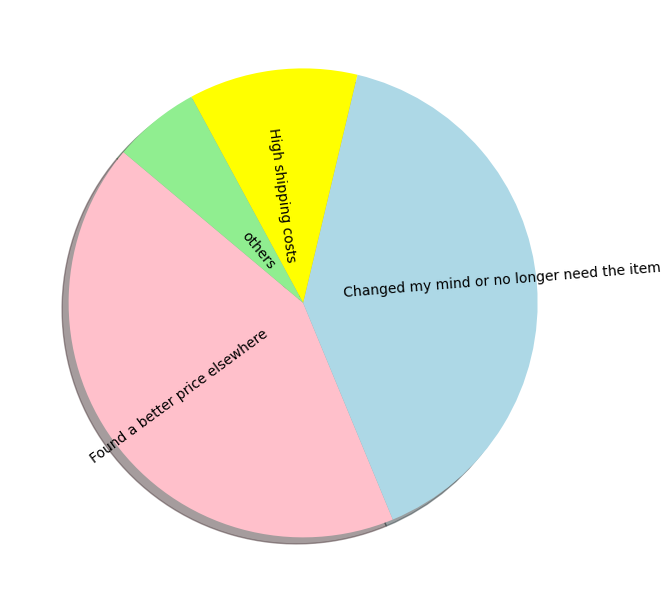

In [9]:
# Question 2: Investigate top factors for cart abandonment – Kyle

# Create pie chart showing abandonment reasons
abandon_counts= amazon_df["Cart_Abandonment_Factors"].value_counts()
colors = ["pink", "lightblue", "yellow", "lightgreen", 'orange']
count_chart = abandon_counts.plot(kind='pie', figsize=(7,7), colors=colors, shadow=True, 
                                  startangle=140, rotatelabels=True, labeldistance=0.17)
plt.ylabel("")

# Save the figure and show it
plt.savefig("Output/KyleFig1.png")
plt.tight_layout()
plt.show()

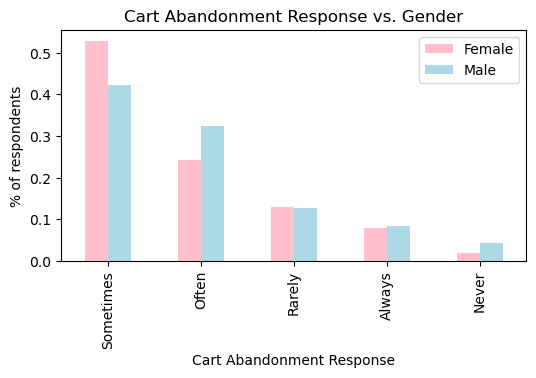

<Figure size 640x480 with 0 Axes>

In [10]:
# Create new df to work with
gender_dataset = amazon_df

# Drop unwanted responses for Gender
gender_dataset = gender_dataset.drop(gender_dataset[gender_dataset["Gender"] == "Prefer not to say"].index)
gender_dataset = gender_dataset.drop(gender_dataset[gender_dataset["Gender"] == "Others"].index)

# Group by Gender and find counts of responses as a % of the total responses for each gender
gender_abandonment = gender_dataset.groupby(["Gender"])
gender_abandonment = gender_abandonment["Cart_Completion_Frequency"].value_counts()
gender_count = gender_dataset["Gender"].value_counts()
gender_abandonment = gender_abandonment/gender_count
gender_abandonment = gender_abandonment.reset_index()

# Break down group into male and female counts
female_abandonment = gender_abandonment.drop(gender_abandonment[gender_abandonment["Gender"] == "Male"].index)
female_abandonment = female_abandonment.reset_index(drop=True)
male_abandonment = gender_abandonment.drop(gender_abandonment[gender_abandonment["Gender"] == "Female"].index)
male_abandonment = male_abandonment.reset_index(drop=True)

# Merge back into one dataframe for graphing
abandonment_df = pd.merge(female_abandonment, male_abandonment, how="left", on=["Cart_Completion_Frequency", "Cart_Completion_Frequency"])

# Clean up merged dataframe
abandonment_df = abandonment_df.rename(columns={"count_x":"Female",
                              "count_y":"Male"})
abandonment_df = abandonment_df.drop(["Gender_x", "Gender_y"], axis=1)
abandonment_df = abandonment_df.set_index("Cart_Completion_Frequency")

# Create chart
count_chart = abandonment_df.plot(kind='bar', figsize=(6,3), color =["pink", "lightblue"])
plt.title("Cart Abandonment Response vs. Gender")
count_chart.set_xlabel("Cart Abandonment Response")
count_chart.set_ylabel("% of respondents")

# Save the figure and show it
plt.savefig("Output/KyleFig2.png")
plt.show()
plt.tight_layout()

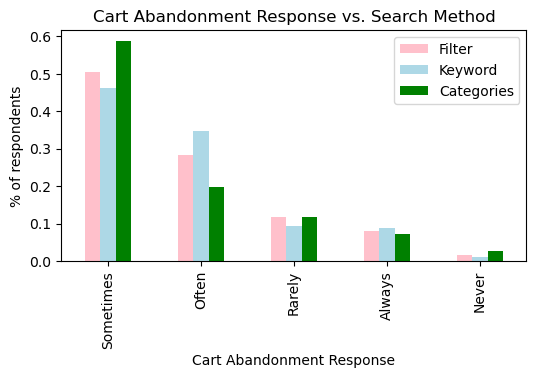

<Figure size 640x480 with 0 Axes>

In [11]:
# Create bar chart of showing % of people for each abandonment frequency vs the search method they used

# Create new df for searches
search_dataset = amazon_df

# Drop unwanted searches
search_dataset = search_dataset.drop(search_dataset[search_dataset["Search_Method"] == "others"].index)

# Group by search method and then get percentages of each response
search_abandonment = search_dataset.groupby(["Search_Method"])
search_abandonment = search_abandonment["Cart_Completion_Frequency"].value_counts()
search_count = search_dataset["Search_Method"].value_counts()
search_abandonment = search_abandonment/search_count

# Reset the index
search_abandonment = search_abandonment.reset_index()

# Extract each search type and reset the index
filter_search = search_abandonment.loc[(search_abandonment["Search_Method"] == "Filter"), :]
filter_search = filter_search.reset_index(drop=True)
keyword_search = search_abandonment.loc[(search_abandonment["Search_Method"] == "Keyword"), :]
keyword_search = keyword_search.reset_index(drop=True)
categories_search = search_abandonment.loc[(search_abandonment["Search_Method"] == "categories"), :]
categories_search = categories_search.reset_index(drop=True)

# Merge all search types into one dataframe and clean the columns
search_df = pd.merge(filter_search, keyword_search, how="left", on=["Cart_Completion_Frequency", "Cart_Completion_Frequency"])
search_df = pd.merge(search_df, categories_search, how="left", on=["Cart_Completion_Frequency", "Cart_Completion_Frequency"])
search_df = search_df.rename(columns={"count_x":"Filter",
                              "count_y":"Keyword", "count":"Categories"})
search_df = search_df.drop(["Search_Method_x", "Search_Method_y", "Search_Method"], axis=1)
search_df = search_df.set_index("Cart_Completion_Frequency")

# Create Chart
count_chart = search_df.plot(kind='bar', figsize=(6,3), color =["pink", "lightblue", "green"])
plt.title("Cart Abandonment Response vs. Search Method")
count_chart.set_xlabel("Cart Abandonment Response")
count_chart.set_ylabel("% of respondents")

# Save the figure and show it
plt.savefig("Output/KyleFig3.png")
plt.show()
plt.tight_layout()

#end question 2

Text(0.5, 1.0, 'Percentage of People that Left Reviews by Gender')

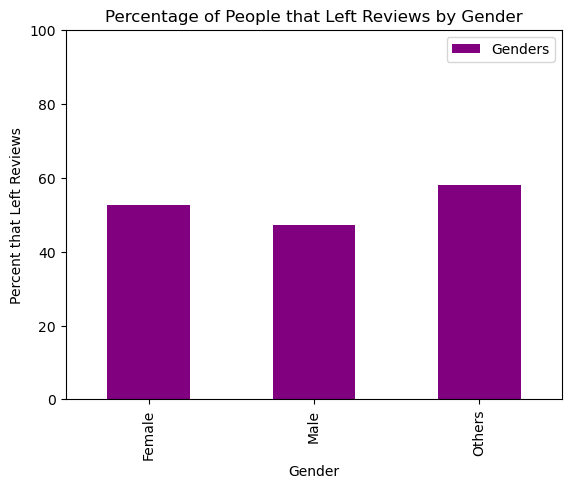

In [12]:
# Question 3: Review question – Eileen. Which type of consumer leaves the most reviews? The least? 

no_review = amazon_df["Review_Left"].eq('No').sum()
no_review

reviews_left = amazon_df["Review_Left"].eq('Yes').sum()
reviews_left

#group by gender
gender_counts = amazon_df.groupby("Gender")["Gender"].count().reset_index(name = "counts")
gender_counts

#group by gender and reviews left
gender_review_counts = amazon_df.groupby(["Gender", "Review_Left"]).size().reset_index(name='Count')
gender_review_counts

# Filter for women and men who said 'Yes'
women_yes_count = gender_review_counts[(gender_review_counts["Gender"] == 'Female') & (gender_review_counts["Review_Left"] == 'Yes')]['Count'].values[0]
men_yes_count = gender_review_counts[(gender_review_counts["Gender"] == 'Male') & (gender_review_counts["Review_Left"] == 'Yes')]['Count'].values[0]
others_yes_count = gender_review_counts[(gender_review_counts["Gender"] == 'Others') & (gender_review_counts["Review_Left"] == 'Yes')]['Count'].values[0]

#percentage of each gender who said yes
women_percentage =  women_yes_count/gender_counts[gender_counts['Gender'] == 'Female']['counts'].values[0]*100
men_percentage =  men_yes_count/gender_counts[gender_counts['Gender'] == 'Male']['counts'].values[0]*100
others_percentage =  others_yes_count/gender_counts[gender_counts['Gender'] == 'Others']['counts'].values[0]*100

percentage_of_reviews_by_gender = pd.DataFrame({
    'Genders': [women_percentage, men_percentage, others_percentage]}, index = ["Female", "Male", "Others"]
)
percentage_of_reviews_by_gender

colors = 'purple'
reviews_by_gender_bar = percentage_of_reviews_by_gender.plot(kind="bar", ylim = (0,100), color=colors)
reviews_by_gender_bar.set_ylabel("Percent that Left Reviews")
reviews_by_gender_bar.set_xlabel("Gender")
reviews_by_gender_bar.set_title("Percentage of People that Left Reviews by Gender")

 

/var/folders/x5/tfmzh4kj5hl7ht9yk8qtgz7m0000gn/T/ipykernel_839/138980777.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range = amazon_df.groupby("Age_Group")["Age_Group"].count().reset_index(name = "counts")
/var/folders/x5/tfmzh4kj5hl7ht9yk8qtgz7m0000gn/T/ipykernel_839/138980777.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_reviews = amazon_df.groupby(["Age_Group", "Review_Left"]).size().reset_index(name='Count')


Text(0.5, 1.0, 'Percentage of People that Left Reviews by Age Range')

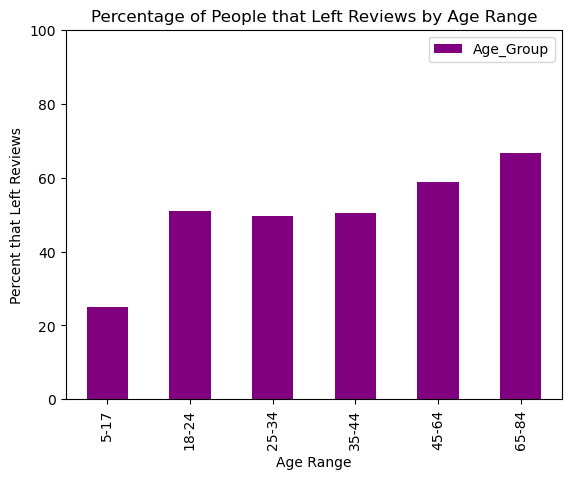

In [13]:
# Creating bins for the age ranges as used by the US Census 
age_bins = [0, 5, 17, 24, 34, 44, 64, 84]
age_group_labels = ['0-5', '5-17', '18-24', '25-34', '35-44', '45-64', '65-84']

# Create a new column in the CSV for "Age_Group" 
amazon_df['Age_Group'] = pd.cut(amazon_df['Age'], bins=age_bins, labels=age_group_labels, right=False)

#group by age
age_range = amazon_df.groupby("Age_Group")["Age_Group"].count().reset_index(name = "counts")
age_range

#group by age group and reviews left
age_range_reviews = amazon_df.groupby(["Age_Group", "Review_Left"]).size().reset_index(name='Count')
age_range_reviews

# Filter for people who said yes in each age range
toddlers_yes = age_range_reviews[(age_range_reviews["Age_Group"] == '0-5') & (age_range_reviews["Review_Left"] == 'Yes')]['Count'].values[0]
kids_yes = age_range_reviews[(age_range_reviews["Age_Group"] == '5-17') & (age_range_reviews["Review_Left"] == 'Yes')]['Count'].values[0]
young_adults_yes  = age_range_reviews[(age_range_reviews["Age_Group"] == '18-24') & (age_range_reviews["Review_Left"] == 'Yes')]['Count'].values[0]
millenial_yes = age_range_reviews[(age_range_reviews["Age_Group"] == '25-34') & (age_range_reviews["Review_Left"] == 'Yes')]['Count'].values[0]
adult_yes = age_range_reviews[(age_range_reviews["Age_Group"] == '35-44') & (age_range_reviews["Review_Left"] == 'Yes')]['Count'].values[0]
middle_aged_yes = age_range_reviews[(age_range_reviews["Age_Group"] == '45-64') & (age_range_reviews["Review_Left"] == 'Yes')]['Count'].values[0]
old_yes = age_range_reviews[(age_range_reviews["Age_Group"] == '65-84') & (age_range_reviews["Review_Left"] == 'Yes')]['Count'].values[0]

#percentage of each age group who said yes
kids_percentage =  kids_yes/age_range.loc[age_range['Age_Group'] == '5-17']['counts'].values[0]*100
young_adults_percentage =  young_adults_yes/age_range.loc[age_range['Age_Group'] == '18-24']['counts'].values[0]*100
millenial_percentage =  millenial_yes/age_range.loc[age_range['Age_Group'] == '25-34']['counts'].values[0]*100
adult_percentage =  adult_yes/age_range.loc[age_range['Age_Group'] == '35-44']['counts'].values[0]*100
middle_aged_percentage =  middle_aged_yes/age_range.loc[age_range['Age_Group'] == '45-64']['counts'].values[0]*100
old_percentage =  old_yes/age_range.loc[age_range['Age_Group'] == '65-84']['counts'].values[0]*100

percentage_of_reviews_by_age = pd.DataFrame({
    'Age_Group': [kids_percentage, young_adults_percentage, millenial_percentage, adult_percentage, middle_aged_percentage, old_percentage]}, index = ["5-17", "18-24", "25-34", "35-44", "45-64", "65-84"])

colors = 'purple'
reviews_by_age_bar = percentage_of_reviews_by_age.plot(kind="bar", ylim = (0,100), color=colors)
reviews_by_age_bar.set_ylabel("Percent that Left Reviews")
reviews_by_age_bar.set_xlabel("Age Range")
reviews_by_age_bar.set_title("Percentage of People that Left Reviews by Age Range")

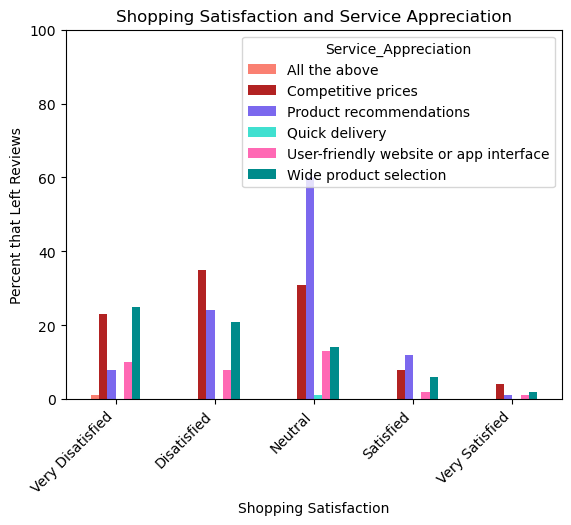

In [14]:
#grouping by shopping satisfaction, service appreciation, and people who left reviews
reviews_left_df = amazon_df[amazon_df['Review_Left'] == 'Yes']

satisfaction_appreciation = reviews_left_df.groupby(["Shopping_Satisfaction", "Service_Appreciation"])['Review_Left'].size().reset_index(name='Review_Count')
satisfaction_appreciation

# Plotting
sat_app_chart = satisfaction_appreciation.pivot(index='Shopping_Satisfaction', columns='Service_Appreciation', values='Review_Count').fillna(0)
colors = ['salmon', 'firebrick', 'mediumslateblue', 'turquoise', 'hotpink', 'darkcyan']

# Plotting
ax = sat_app_chart.plot(kind='bar', stacked=False, color=colors)

# Set y-axis limits
ax.set_ylim(0, 100)

# Set labels and ticks for better readability
ax.set_xticklabels(["Very Disatisfied", "Disatisfied", "Neutral", "Satisfied", "Very Satisfied"], rotation=45, ha="right")
ax.set_xlabel("Shopping Satisfaction")
ax.set_ylabel("Percent that Left Reviews")
ax.set_title("Shopping Satisfaction and Service Appreciation")

# Show the plot
plt.show()

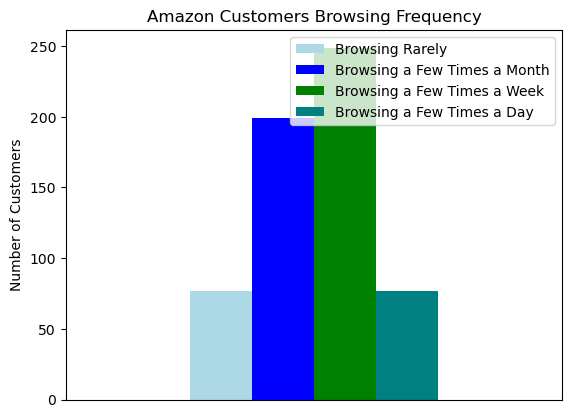

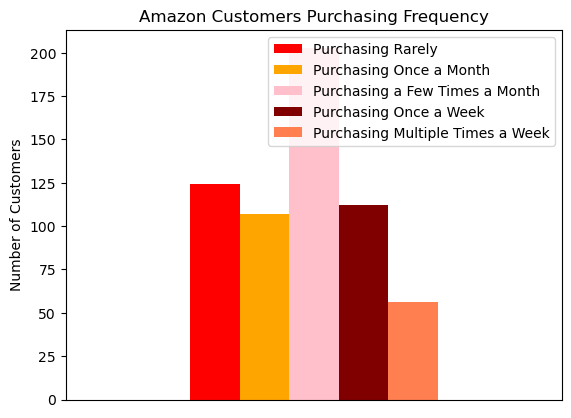

In [15]:
# Question 4: How do browsing frequency and purchase frequency compare? - Bridget 

# create a summary table for purchasing 
# count number of people for each category of browsing
browsing_rarely = amazon_df["Browsing_Frequency"].value_counts()["Rarely"]
browsing_few_monthly = amazon_df["Browsing_Frequency"].value_counts()["Few times a month"]
browsing_few_weekly = amazon_df["Browsing_Frequency"].value_counts()["Few times a week"]
browsing_daily = amazon_df["Browsing_Frequency"].value_counts()["Multiple times a day"]

# list for browsing
b_list = ["Rarely", "Few times a month", "Few times a week", "Multiple times a day"]
b_filter = [amazon_df["Browsing_Frequency"]== b for b in b_list]
b_counts = [amazon_df.loc[b, "Browsing_Frequency"].value_counts() for b in b_filter]

# create tiny data frame from all of these plots
browsing_dict = ({"Browsing Rarely":[browsing_rarely], 
                           "Browsing a Few Times a Month":[browsing_few_monthly], 
                           "Browsing a Few Times a Week":[browsing_few_weekly], 
                           "Browsing a Few Times a Day":[browsing_daily]})
# b_cols = (browsing_rarely, browsing_few_monthly, browsing_few_weekly, browsing_daily)                            
browsing_df = pd.DataFrame(browsing_dict)
browsing_df.rename(columns={0 :'Frequency of Browsing'}, inplace=True)
browsing_df

# create browsing bar plot
browsing_df.plot(kind = 'bar', color = ['lightblue', 'blue', 'green', 'teal'], xticks=None,  ylabel = 'Number of Customers', title = 'Amazon Customers Browsing Frequency')
plt.xticks([]) 

# save browsing plot elsewhere
plt.savefig("Output/BrowsingBar.png")

# do the same thing for purchasing
purchase_count = amazon_df["Purchase_Frequency"].value_counts()
purchase_rarely = amazon_df["Purchase_Frequency"].value_counts()["Less than once a month"]
purchase_once_monthly = amazon_df["Purchase_Frequency"].value_counts()["Once a month"]
purchase_few_monthly = amazon_df["Purchase_Frequency"].value_counts()["Few times a month"]
purchase_once_weekly = amazon_df["Purchase_Frequency"].value_counts()["Once a week"]
purchase_weekly = amazon_df["Purchase_Frequency"].value_counts()["Multiple times a week"]

# create tiny data frame from all of these plots
purchase_dict = ({"Purchasing Rarely":[purchase_rarely], 
                           "Purchasing Once a Month":[purchase_once_monthly], 
                           "Purchasing a Few Times a Month":[purchase_few_monthly], 
                           "Purchasing Once a Week":[purchase_once_weekly],
                           "Purchasing Multiple Times a Week":[purchase_weekly]})
                            
purchasing_df = pd.DataFrame(purchase_dict)
purchasing_df.rename(columns={0 :'Frequency of Purchasing'}, inplace=True)
purchasing_df

# create purchasing bar plot
purchasing_df.plot(kind = 'bar', color = ['red', 'orange', 'pink', 'maroon', 'coral'], xticks=None, ylabel = 'Number of Customers', title = 'Amazon Customers Purchasing Frequency')
plt.xticks([]) 

# save purchasing bar plot elsewhere
plt.savefig("Output/PurchasingBar.png")



In [16]:
# show purchasing numbers to check work
purchasing_df

,Purchasing Rarely,Purchasing Once a Month,Purchasing a Few Times a Month,Purchasing Once a Week,Purchasing Multiple Times a Week
0,124,107,203,112,56


In [17]:
# show browsing numbers to check work
browsing_df

,Browsing Rarely,Browsing a Few Times a Month,Browsing a Few Times a Week,Browsing a Few Times a Day
0,77,199,249,77


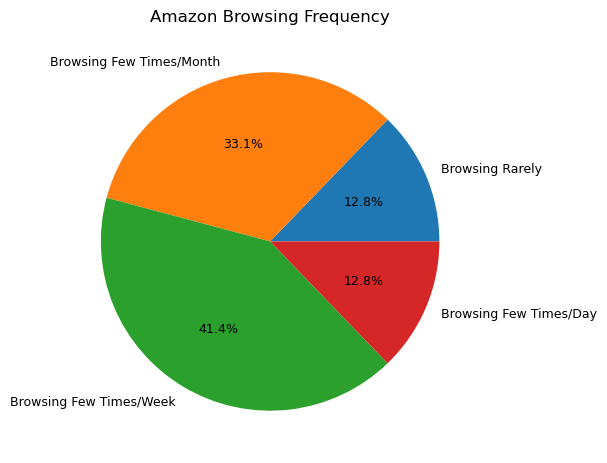

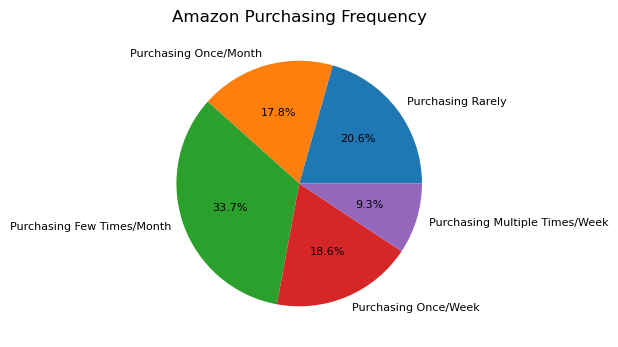

In [18]:
# count the percentages of each category for purchasing
x = [77, 199 , 249, 77]
labels = ['Browsing Rarely', 'Browsing Few Times/Month', 'Browsing Few Times/Week', 
                        'Browsing Few Times/Day']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%', textprops={'fontsize': 9})
ax.set_title('Amazon Browsing Frequency')
plt.tight_layout()

# export browsing pie
plt.savefig("Output/BrowsingPie.png")

# count the percentages of each category for purchasing
x = [124, 107 , 203, 112, 56]
labels = ['Purchasing Rarely', 'Purchasing Once/Month', 'Purchasing Few Times/Month', 
                        'Purchasing Once/Week', 'Purchasing Multiple Times/Week']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%', textprops={'fontsize': 8})
ax.set_title('Amazon Purchasing Frequency')
plt.tight_layout()

# export purchasing pie 
plt.savefig("Output/PurchasingPie.png")

# end question 4

In [19]:
# rename columns
col_names = amazon_df.columns.tolist()

for i in range(6):
    print(f"\n{col_names[i*4:(i+1)*4]}")

cols = [
    "Personalized_Recommendation_Frequency",
    "Product_Search_Method",
    "Search_Result_Exploration",
    "Saveforlater_Frequency",
    "age",
]

vals = [
    "Recommendation_Frequency",
    "Search_Method",
    "Exploration",
    "Save_for_Later_Frequency",
    "Age",
]

amazon_df = amazon_df.rename(columns=dict(zip(cols, vals)))
amazon_df.head()

# define variables as dictionaries or lists here
age = amazon_df.Age.to_list()

for i in range(5):
    print(f"\n{age[i*20:(i+1)*20]}")


['Index', 'Timestamp', 'Age', 'Gender']

['Purchase_Frequency', 'Purchase_Categories', 'Recommendation_Frequency', 'Browsing_Frequency']

['Search_Method', 'Exploration', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing']

['Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Save_for_Later_Frequency', 'Review_Left']

['Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness']

['Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas']

[23, 23, 24, 24, 22, 21, 22, 21, 20, 23, 22, 25, 23, 24, 21, 23, 16, 21, 23, 25]

[64, 23, 21, 16, 23, 24, 22, 23, 23, 24, 25, 23, 23, 23, 23, 24, 24, 23, 29, 19]

[26, 32, 30, 22, 26, 24, 23, 24, 23, 24, 23, 25, 24, 21, 23, 26, 23, 23, 40, 25]

[24, 23, 24, 24, 24, 26, 23, 23, 24, 23, 24, 36, 26, 31, 23, 23, 30, 24, 47, 54]

[58, 53, 23, 25, 23, 32, 30, 28, 20, 25, 55, 24, 62, 27, 34, 40, 22, 34, 24, 44]


In [20]:
browse = amazon_df.Browsing_Frequency

purchase = amazon_df.Purchase_Frequency

idx = ["Rarely", "Few times a month", "Few times a week", "Multiple times a day"]

cols = [
    "Less than once a month",
    "Once a month",
    "Few times a month",
    "Once a week",
    "Multiple times a week",
]

cross_tabs = pd.crosstab(browse, purchase)
cross_tabs

chi2_stat, p, dof, expected = st.chi2_contingency(cross_tabs)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
# print(f"expected frequencies:\n{expected}")

freq = ([int(i) for i in f] for f in np.round(expected))
list(zip(*freq)) 

chi2 statistic:     134.16
p-value:            9.0149e-23
degrees of freedom: 12


[(67, 84, 26, 26),
 (41, 51, 16, 16),
 (19, 23, 7, 7),
 (35, 44, 14, 14),
 (37, 46, 14, 14)]

In [21]:
idx = ["Rarely", "Few times a month", "Few times a week", "Multiple times a day"]

cols = [
    "Less than once a month",
    "Once a month",
    "Few times a month",
    "Once a week",
    "Multiple times a week",
]

cats = ["Purchase_Frequency", "Browsing_Frequency"]
df = amazon_df[cats].rename_axis("Freqs").reset_index().groupby(cats).count()
pb_counts = df.Freqs.to_list()

vals =[pb_counts[4*i:4*i +4] for i in range(5)]

pd.DataFrame(dict(zip(cols,vals)), index=idx)


amazon_df[cats].groupby(cats[0]).value_counts()

Purchase_Frequency      Browsing_Frequency  
Few times a month       Few times a week        96
                        Few times a month       71
                        Multiple times a day    25
                        Rarely                  11
Less than once a month  Rarely                  50
                        Few times a month       41
                        Few times a week        27
                        Multiple times a day     6
Multiple times a week   Few times a week        29
                        Multiple times a day    16
                        Few times a month        9
                        Rarely                   2
Once a month            Few times a week        44
                        Few times a month       41
                        Multiple times a day    12
                        Rarely                  10
Once a week             Few times a week        53
                        Few times a month       37
                        Multiple time

In [22]:
table_counts = pd.DataFrame(cross_tabs, columns=cols, index=idx)
table_counts.index.name = "Browsing Frequency"
table_counts.style.background_gradient(cmap='PuBu')

,Less than once a month,Once a month,Few times a month,Once a week,Multiple times a week
Browsing Frequency,,,,,
Rarely,50,10,11,4,2
Few times a month,41,41,71,37,9
Few times a week,27,44,96,53,29
Multiple times a day,6,12,25,18,16
